<a href="https://colab.research.google.com/github/AzadMehedi/ML-Algorithoms/blob/main/PCA_%26_Dimensionality_Reduction(Unsupervised).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# define feature and target variable

features = ['sepal_length','sepal_width','petal_length','petal_width']
x = df[features]
y = df['species']

In [4]:
# scalling the dataset
# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# scaler.fit(x)
scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


Since our dataset has 4 feature variables so the dimension of this dataset will also be 4. From this dataset we can get maximum 4 principal components. Suppose we want to see all the principal components of this dataset,

In [7]:
# from sklearn.decomposition import PCA

pca = PCA(n_components=4)
# pca.fit(scaled)
principalComponents = pca.fit_transform(scaled)
principalDF = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2', 'pc3', 'pc4'])
principalDF

,pc1,pc2,pc3,pc4
0,-0.630361,0.111556,-0.016993,-0.006891
1,-0.623546,-0.100313,-0.047120,-0.032316
2,-0.669793,-0.047220,0.021648,-0.007186
3,-0.654633,-0.098791,0.025214,0.020285
4,-0.648263,0.137558,0.016813,0.012302
...,...,...,...,...
145,0.551755,0.058990,0.085968,-0.109943
146,0.406278,-0.172227,-0.003916,-0.065545
147,0.447293,0.036996,0.049336,-0.032655
148,0.489218,0.149121,0.238719,0.003414


In [11]:
# adding the target variable into these principal components to see the dataset
finalDF = pd.concat([principalDF, df[['species']]], axis=1)
finalDF.head()

,pc1,pc2,pc3,pc4,species
0,-0.630361,0.111556,-0.016993,-0.006891,setosa
1,-0.623546,-0.100313,-0.047120,-0.032316,setosa
2,-0.669793,-0.047220,0.021648,-0.007186,setosa
3,-0.654633,-0.098791,0.025214,0.020285,setosa
4,-0.648263,0.137558,0.016813,0.012302,setosa


now lets see importanc of our components of principle components


In [12]:
pca.explained_variance_ratio_

array([0.84141901, 0.11732474, 0.03490564, 0.00635061])

<Axes: xlabel='PC', ylabel='var'>

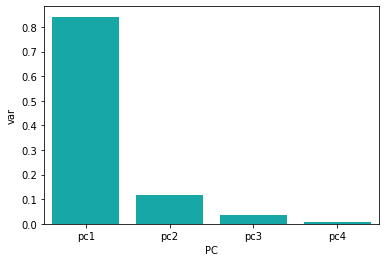

In [13]:
feture_importance = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':['pc1', 'pc2', 'pc3', 'pc4']})
sns.barplot(data=feture_importance, x='PC', y='var', color='c')

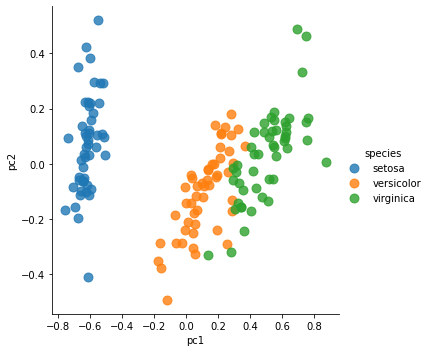

In [17]:
# lets make a plot using 2 most importanc principle component
sns.lmplot(data=finalDF, x='pc1', y='pc2', hue='species', fit_reg=False, legend=True, scatter_kws={'s':80})